In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = xr.open_dataset('datasets/age.2020.1.GTS2012.1m.nc')
ds

<xarray.Dataset> Size: 934MB
Dimensions:  (lat: 10801, lon: 21601)
Coordinates:
  * lat      (lat) float64 86kB -90.0 -89.98 -89.97 -89.95 ... 89.97 89.98 90.0
  * lon      (lon) float64 173kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    z        (lat, lon) float32 933MB ...
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdmath
    history:      grdmath /Volumes/izanagi/Agegrids/2019_v3_testing/NoMask/ag...
    GMT_version:  6.0.0_b03d6d7_2019.03.06 [64-bit]

In [3]:
gra = pd.read_csv('datasets/GRA_DataLITH.csv')

/tmp/ipykernel_2832950/3578384810.py:1: DtypeWarning: Columns (0,5,6,16,17,19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  gra = pd.read_csv('datasets/GRA_DataLITH.csv')


In [88]:
gra.columns

Index(['Exp', 'Site', 'Hole', 'Core', 'Type', 'Sect', 'A/W', 'Offset (cm)',
       'Depth CSF-A (m)', 'Depth CSF-B (m)', 'Bulk density (GRA)',
       'Timestamp (UTC)', 'Instrument', 'Instrument group', 'Text ID',
       'Test No.', 'Comments', 'Sample comments', 'Test comments',
       'Result comments', 'Prefix', 'Principal', 'Suffix', 'Full Lithology',
       'Simplified Lithology', 'Lithology Type', 'Degree of Consolidation',
       'Lithology Subtype', 'Expanded Core Type', 'Latitude (DD)',
       'Longitude (DD)', 'Water Depth (mbsl)'],
      dtype='object')

In [102]:
mean_gra = gra[['Latitude (DD)', 'Longitude (DD)', 'Bulk density (GRA)']].groupby(['Latitude (DD)', 'Longitude (DD)']).mean().reset_index()

gralats = mean_gra['Latitude (DD)'].values
gralons = mean_gra['Longitude (DD)'].values
lats = xr.DataArray(gralats, dims='points')
lons = xr.DataArray(gralons, dims='points')
mean_gra['age'] = ds.sel(lat=lats, lon=lons, method='nearest').z.values

<Axes: xlabel='age', ylabel='Bulk density (GRA)'>

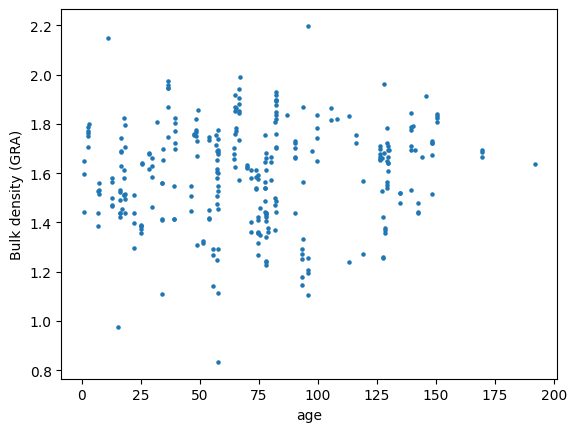

In [103]:
mean_gra.plot.scatter(x='age', y='Bulk density (GRA)', marker='.')

In [105]:
mean_gra

,Latitude (DD),Longitude (DD),Bulk density (GRA),age
0,-76.553770,-174.757753,1.827930,NaN
1,-75.683918,-179.671847,1.673463,NaN
2,-75.001005,-173.920047,1.821240,NaN
3,-74.217562,-173.632230,1.577805,74.522385
4,-74.217378,-173.633642,1.592235,74.522385
...,...,...,...,...
524,59.532183,-144.134123,1.916432,NaN
525,59.688998,-143.200998,1.770278,NaN
526,60.153195,-179.470060,1.621663,69.796310
527,60.153495,-179.470382,1.623185,69.796310


In [112]:
gra_wage = gra.merge(mean_gra, on=['Latitude (DD)', 'Longitude (DD)'], how='left')
gra_wage.head()

,Exp,Site,Hole,Core,Type,Sect,A/W,Offset (cm),Depth CSF-A (m),Depth CSF-B (m),...,Simplified Lithology,Lithology Type,Degree of Consolidation,Lithology Subtype,Expanded Core Type,Latitude (DD),Longitude (DD),Water Depth (mbsl),Bulk density (GRA)_y,age
0,318,U1355,A,1,R,1,NaN,2.5,0.025,0.017,...,sand,sedimentary,unconsolidated,clastic,RCB,-63.841173,138.823783,3729.04,1.979488,NaN
1,318,U1355,A,1,R,1,NaN,5.0,0.050,0.033,...,sand,sedimentary,unconsolidated,clastic,RCB,-63.841173,138.823783,3729.04,1.979488,NaN
2,318,U1355,A,1,R,1,NaN,7.5,0.075,0.050,...,sand,sedimentary,unconsolidated,clastic,RCB,-63.841173,138.823783,3729.04,1.979488,NaN
3,318,U1355,A,1,R,1,NaN,12.5,0.125,0.083,...,sand,sedimentary,unconsolidated,clastic,RCB,-63.841173,138.823783,3729.04,1.979488,NaN
4,318,U1355,A,1,R,1,NaN,15.0,0.150,0.099,...,sand,sedimentary,unconsolidated,clastic,RCB,-63.841173,138.823783,3729.04,1.979488,NaN


/tmp/ipykernel_2832950/798079908.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one_gra = gra_wage[gra_wage.Hole=='A'][gra_wage.age==ages[0]]


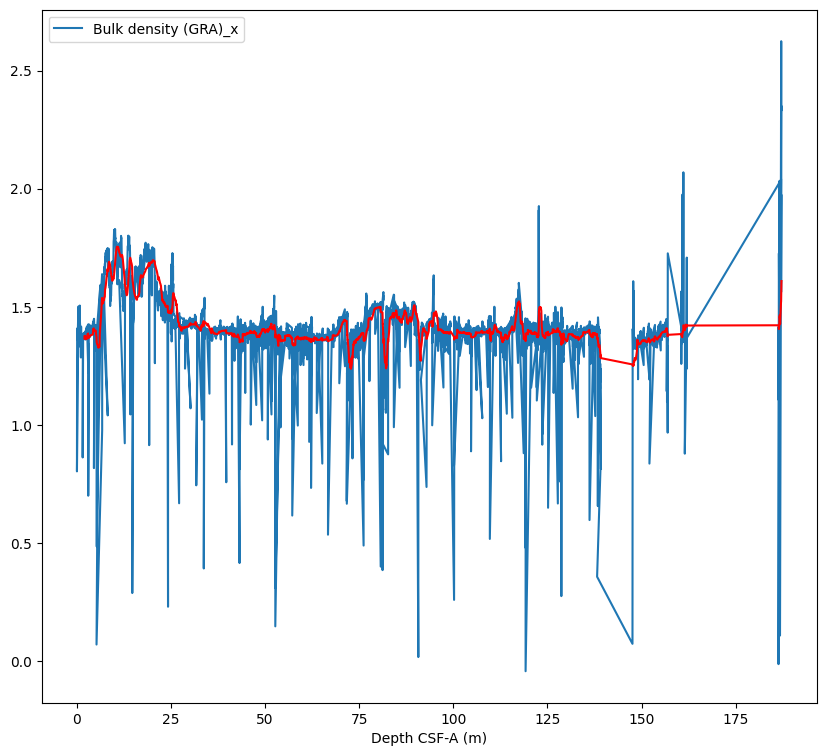

In [123]:
fig, ax = plt.subplots(figsize=(10, 9))

ages = gra_wage.age.unique()[1:]

one_gra = gra_wage[gra_wage.Hole=='A'][gra_wage.age==ages[0]]
    
one_gra[['Bulk density (GRA)_x', 'Depth CSF-A (m)']].plot('Depth CSF-A (m)', 'Bulk density (GRA)_x', ax=ax)
roll = one_gra[one_gra['Bulk density (GRA)_x'].between(0, 4)][['Depth CSF-A (m)', 'Bulk density (GRA)_x']].sort_values('Depth CSF-A (m)').rolling(window=50, on='Depth CSF-A (m)').mean()#.plot('Bulk density (GRA)')
ax.plot(roll['Depth CSF-A (m)'], roll['Bulk density (GRA)_x'], color='red')

In [144]:
def plot_bulk_density_with_rolling(df, depth_col='Depth CSF-A (m)', 
                                   density_col='Bulk density (GRA)_x',
                                   ax=None, window=50, 
                                   density_range=(0, 4),
                                   raw_color='C0', smooth_color='red'):
    """
    Plot bulk density vs depth with rolling average overlay.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing depth and bulk density data
    depth_col : str
        Column name for depth values (default: 'Depth CSF-A (m)')
    density_col : str
        Column name for bulk density values (default: 'Bulk density (GRA)_x')
    ax : matplotlib.axes.Axes, optional
        Axes object to plot on. If None, uses current axes
    window : int
        Window size for rolling average (default: 50)
    density_range : tuple
        Min and max density values to include (default: (0, 4))
    raw_color : str
        Color for raw data points (default: 'C0')
    smooth_color : str
        Color for rolling average line (default: 'red')
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        The axes object with the plot
    """
    import matplotlib.pyplot as plt
    
    # Create axes if not provided
    if ax is None:
        ax = plt.gca()
    
    # Plot raw data
    # df[[density_col, depth_col]].plot(depth_col, density_col, ax=ax, 
                                      # color=raw_color, legend=False)
    
    # Calculate rolling average on filtered data
    filtered = df[df[density_col].between(*density_range)]
    roll = (filtered[[depth_col, density_col]]
            .sort_values(depth_col)
            .rolling(window=window, on=depth_col)
            .mean())
    
    # Plot rolling average
    ax.plot(roll[depth_col], roll[density_col], color=smooth_color, 
            linewidth=2, label=f'Rolling avg (window={window})', alpha=0.2)
    
    ax.set_xlabel(depth_col)
    ax.set_ylabel(density_col)
    # ax.legend()
    
    return ax

/tmp/ipykernel_2832950/1495391373.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one_gra = gra_wage[gra_wage.Hole=='A'][gra_wage.age==ages[0]]


<Axes: xlabel='Depth CSF-A (m)', ylabel='Bulk density (GRA)_x'>

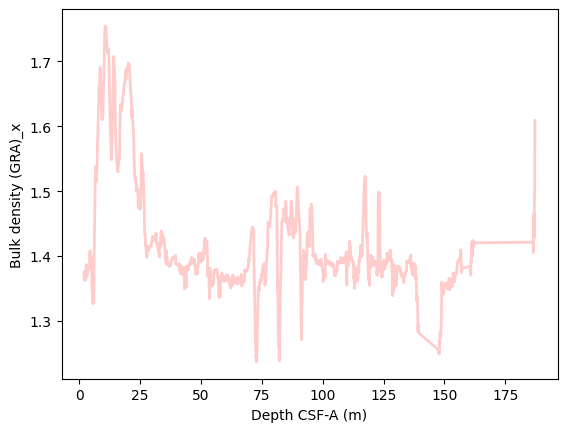

In [145]:
one_gra = gra_wage[gra_wage.Hole=='A'][gra_wage.age==ages[0]]

plot_bulk_density_with_rolling(one_gra)

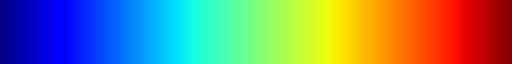

In [150]:
plt.cm.jet

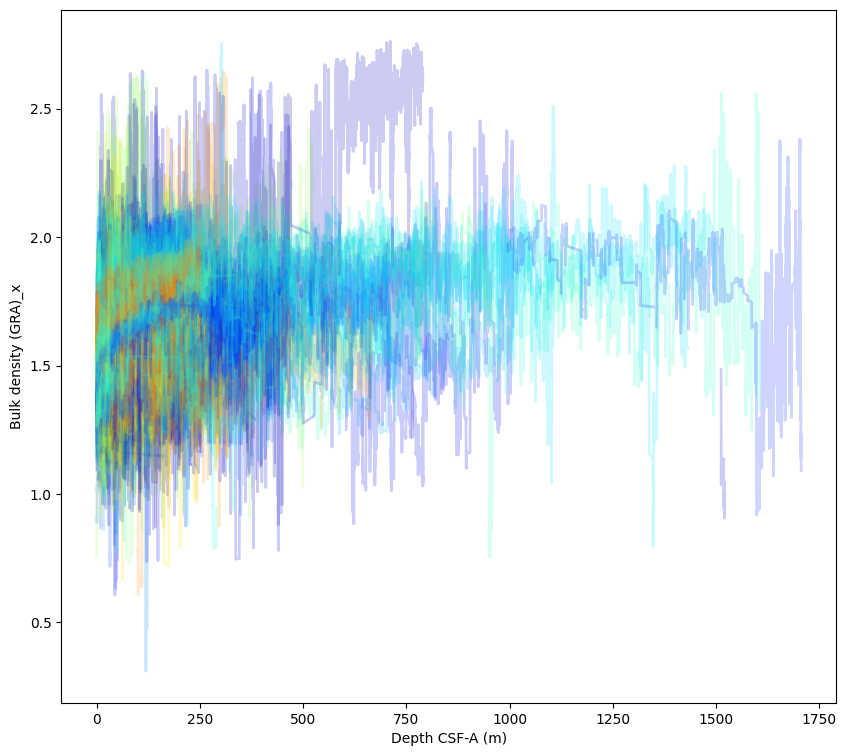

In [152]:
fig, ax = plt.subplots(figsize=(10, 9))

ages = gra_wage.age.unique()[1:]

for age in ages:
    df = gra_wage[gra_wage.age==age]
    holes = df.Hole.unique()
    for hole in holes:
        dfh = df[df.Hole==hole]
        plot_bulk_density_with_rolling(dfh, ax=ax, smooth_color=plt.cm.jet(age/max(ages)), window=50)

In [134]:
df

,Exp,Site,Hole,Core,Type,Sect,A/W,Offset (cm),Depth CSF-A (m),Depth CSF-B (m),...,Simplified Lithology,Lithology Type,Degree of Consolidation,Lithology Subtype,Expanded Core Type,Latitude (DD),Longitude (DD),Water Depth (mbsl),Bulk density (GRA)_y,age


In [41]:
ds.sel(lon=138.823783, method='nearest').z.values

array([      nan,       nan,       nan, ..., 55.433002, 55.483276,
       55.53386 ], shape=(10801,), dtype=float32)

In [46]:
ds.lat.shape

(10801,)

In [64]:
lats = np.linspace(-90, 90, 10801)
lats[1573]

np.float64(-63.78333333333333)

In [68]:
ds.sel(lon=138.823783, lat=-63.78333, method='nearest').z.values

array(nan, dtype=float32)